In [1]:
#import libraries for tweets sentiment analysis

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
log = pd.read_csv('tweetapi.csv')

In [3]:
# Twitter API credentials

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessSecret = log['key'][3]

In [4]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# set the access token and secret
authenticate.set_access_token(accessToken, accessSecret)

# careate the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
# extract tweets from twitter user

username = 'SpaceX'
tweetsno = 200


posts = api.user_timeline(screen_name = username, count=tweetsno, lang= 'en', tweet_mode='extended')

#print last 5 tweets from the account
print("Show the 5 recent tweets: \n")

i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i += 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) RT @AstroMarshburn: Endurance has arrived at the Hangar! We can’t wait to ride this @SpaceX Dragon to the @Space_Station in a few days… htt…

2) Gateway to Mars https://t.co/cej13QdyJP

3) RT @elonmusk: Starbase under construction https://t.co/cFXJKvYJjY

4) First firing of a Raptor vacuum engine integrated onto a Starship https://t.co/uCNAt8Kwzo

5) RT @Commercial_Crew: Launch Update ➡️ @NASA and @SpaceX are now targeting 2:21am ET Sunday, Oct. 31, for the #Crew3 mission to the @Space_S…



In [6]:
# create dataframe with column for tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns = ['Tweets'])

#show 1st 5 rows
df.head()

,Tweets
0,RT @AstroMarshburn: Endurance has arrived at t...
1,Gateway to Mars https://t.co/cej13QdyJP
2,RT @elonmusk: Starbase under construction http...
3,First firing of a Raptor vacuum engine integra...
4,RT @Commercial_Crew: Launch Update ➡️ @NASA an...


In [7]:
# cleaning the text

# function to clean tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # removes @mention
    text = re.sub(r'#','', text) # removes hashtag symbols
    text = re.sub(r'RT[\s]+', '', text) # removes RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removes URL
    
    return text

In [8]:
# cleaning the tweets with above function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,: Endurance has arrived at the Hangar! We can’...
1,Gateway to Mars
2,: Starbase under construction
3,First firing of a Raptor vacuum engine integra...
4,_Crew: Launch Update ➡️ and are now targetin...
...,...
195,Falcon 9 launches SXM-8 to orbit – SpaceX’s 12...
196,Deployment of SXM-8 confirmed
197,Falcon 9’s first stage booster has landed on t...
198,Liftoff!


In [9]:
# create function to get the subjectivity with TextBlob
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

# create function to get the polarity (negative or positive)
def getPolar(text):
    return TextBlob(text).sentiment.polarity

# create columns for the functions
df['Subjectivity'] = df['Tweets'].apply(getSubject)
df['Polarity'] = df['Tweets'].apply(getPolar)

# new dataframe
df

,Tweets,Subjectivity,Polarity
0,: Endurance has arrived at the Hangar! We can’...,0.100000,-0.200000
1,Gateway to Mars,0.000000,0.000000
2,: Starbase under construction,0.000000,0.000000
3,First firing of a Raptor vacuum engine integra...,0.166667,0.120833
4,_Crew: Launch Update ➡️ and are now targetin...,0.000000,0.000000
...,...,...,...
195,Falcon 9 launches SXM-8 to orbit – SpaceX’s 12...,0.950000,0.750000
196,Deployment of SXM-8 confirmed,1.000000,0.400000
197,Falcon 9’s first stage booster has landed on t...,0.333333,0.250000
198,Liftoff!,0.000000,0.000000


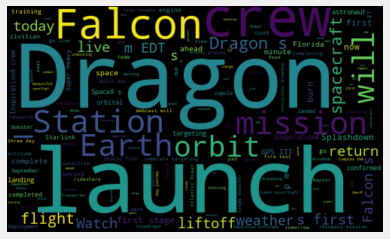

In [10]:
# plt word cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width= 500, height= 300, random_state = 53, max_font_size= 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
# create function to compute the negative, neutral, positive analysis.
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: Endurance has arrived at the Hangar! We can’...,0.100000,-0.200000,Negative
1,Gateway to Mars,0.000000,0.000000,Neutral
2,: Starbase under construction,0.000000,0.000000,Neutral
3,First firing of a Raptor vacuum engine integra...,0.166667,0.120833,Positive
4,_Crew: Launch Update ➡️ and are now targetin...,0.000000,0.000000,Neutral
...,...,...,...,...
195,Falcon 9 launches SXM-8 to orbit – SpaceX’s 12...,0.950000,0.750000,Positive
196,Deployment of SXM-8 confirmed,1.000000,0.400000,Positive
197,Falcon 9’s first stage booster has landed on t...,0.333333,0.250000,Positive
198,Liftoff!,0.000000,0.000000,Neutral


In [12]:
# print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') '+ sortedDF['Tweets'][i])
        print()
        j += 1

1) First firing of a Raptor vacuum engine integrated onto a Starship 

2) : Starlink is designed for low to medium population density, which means we can hit max users in some areas fast. 

Please sign…

3) Splashdown of Dragon confirmed, completing SpaceX’s 23rd cargo resupply mission to the _station!

4) Separation confirmed! Dragon is performing 3 departure burns to move away from the _station

5) : LIVE NOW: A  Dragon spacecraft returns to Earth with _Research that could help us better understand neurodegenerative…

6) After its ~one-month stay at the _station, the Dragon spacecraft supporting SpaceX’s 23rd resupply mission for  will undock from the orbiting lab tomorrow at 9:05 a.m. EDT. Watch live beginning at ~8:45 a.m. →  

7) : On Thurs., Sept. 30, _Research that could help us better understand neurodegenerative diseases, gene expression, &amp; muscle atr…

8) More pics from  return →  

9) : The moment when me and my amazing crew, , ,  opened up the  cupola fo…

10) : Jared, 

In [13]:
# print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+ ') '+ sortedDF['Tweets'][i])
        print()
        j += 1

1) : Endurance has arrived at the Hangar! We can’t wait to ride this  Dragon to the _Station in a few days… htt…

2) Dragon reenters Earth’s atmosphere before splashing down off the coast of Florida – completing the fifth reentry of a Dragon spacecraft this year 

3) Nosecone is closed for reentry

4) After three days on-orbit, Dragon and the  crew will return to Earth today and splash down at ~7:06 p.m. EDT in the Atlantic Ocean off the coast of Florida →  

5) After three days in space, Dragon will reenter Earth’s atmosphere and splash down off the coast of Florida 

6) Dragon and the  crew will orbit Earth for three days at an altitude of ~575 km, flying farther than any other human spaceflight since the Hubble missions 

7) Crew of  arriving at Launch Complex 39A for flight 

8) Crew send off before they make their way to Launch Complex 39A 

9) Falcon 9 and Dragon vertical on historic Launch Complex 39A ahead of launching  

10) This spacecraft previously supported the Crew-1 miss

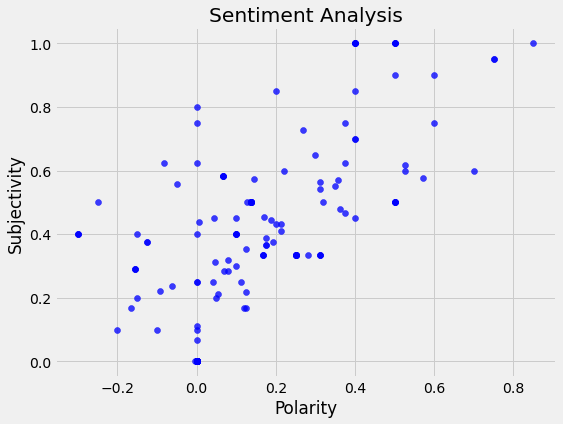

In [14]:
# plt the polarity and subjectivity
plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue', alpha=0.76)
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
# get percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 2)

51.0

In [16]:
# get percentage of positive tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 2)

9.5

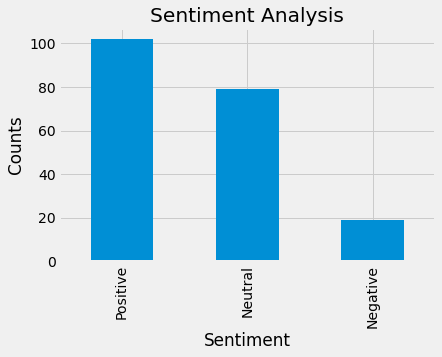

In [17]:
# show counts of tweets

df['Analysis'].value_counts()

#plot and visualise
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()